# opencv course
# A presentation by Mohammad Kahkeshani
### instagram:
#### codevision_academy
#### kahkeshani_mohammad

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### make image binary

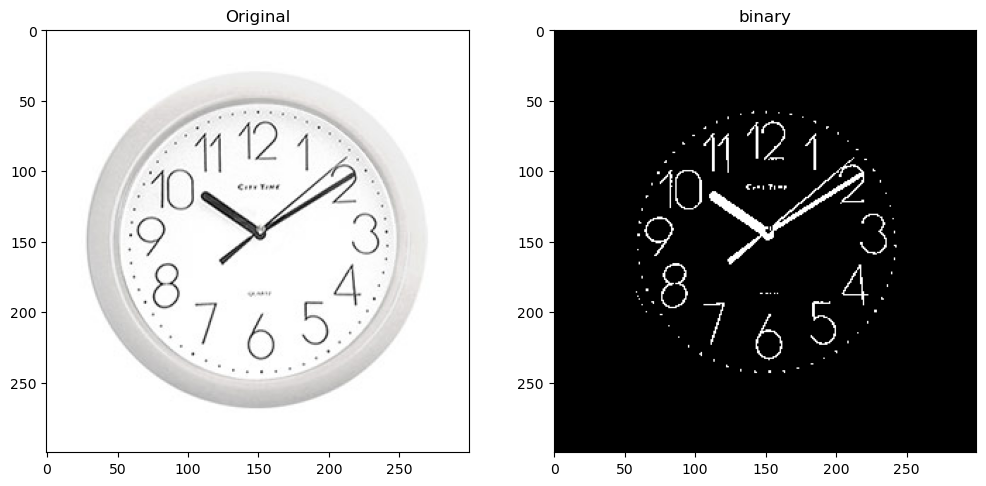

In [2]:
# Read image
image = cv2.imread("images/clock.jpg")
# Convert BGR back to grayscale:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Threshold via Otsu:
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.figure(figsize=[12,7])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(122);plt.imshow(binary, cmap='gray');plt.title("binary");

### morphology

عملیات مورفولوژی روی تصویر باینری انجام شد تا عقربه‌های ساعت (که به صورت خطوط باریک هستند) از نویزها جدا و شفاف‌تر شوند و بعد الگوریتم هاف بتواند آن‌ها را به عنوان "خط" شناسایی کند.

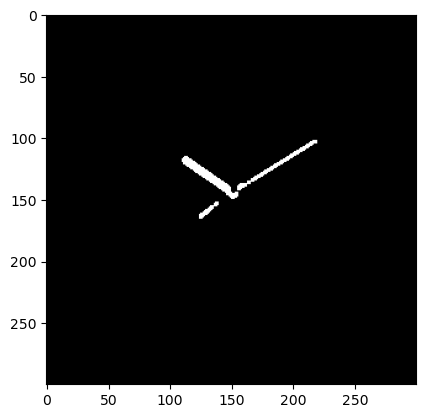

In [3]:
# Get the structuring element:
structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, structuringElement)
plt.imshow(opening, cmap='gray')

### Line estimation

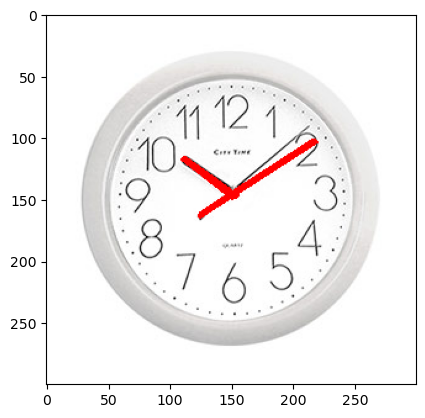

In [4]:
# Set HoughLinesP parameters:
lineThresh = 50
minLineLength = 20
maxLineGap = 100

# Run the line detection:
lines = cv2.HoughLinesP(opening, 1, np.pi/180 , lineThresh, None, minLineLength, maxLineGap)

# Prepare some lists to store every coordinate of the detected lines:
X1 = []
X2 = []
Y1 = []
Y2 = []
draw_image = image.copy()
# Store and draw the lines:
for [line] in lines:
    # First point:
    x1 = line[0]
    y1 = line[1]
    X1.append(x1)
    Y1.append(y1)

    # Second point:
    x2 = line[2]
    y2 = line[3]
    X2.append(x2)
    Y2.append(y2)

    # Draw the lines:
    cv2.line(draw_image, (x1,y1), (x2,y2), (0,0,255), 2)
    cv2.imshow("Lines", draw_image)
    cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(draw_image[...,::-1], cmap='gray')